# Industriel Engineering 
#### **Presented By :       Lian Refaelov , Shifra Fuchs, Osher Moyal , Dolev Levavi**

- Wrangling the data and Understanding it
- Audience Quiz: The most wanted position, The specialization where you earn the most
- Facility vs Salary
- Specialization vs Salary 
- Position vs Salary

### *Wrangling the data and Understanding it*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
font1 = {'family':'serif','color':'darkorange','size':25}
font2 = {'family':'serif','color':'purple','size':15}

In [ ]:
url = "IndustrielEngineeringData.csv"
industriel_data_df = pd.read_csv(url)
industriel_data_df.head()

In [ ]:
industriel_data_df.columns = ['Date', 'Status', 'Facility', 'Classification', 'Specialization', 'Company', 'Experience', 'Salary', 'Salary_kind', 'Remarks', 'Car']
industriel_data_df.head()

In [ ]:
industriel_data_df['Date'] = pd.to_datetime(industriel_data_df['Date'])
industriel_data_df['Year'] = pd.DatetimeIndex(industriel_data_df['Date']).year
industriel_data_df.head()

In [ ]:
industriel_data_df.dtypes

##### droping unnecessary columns and fixing missing values

In [ ]:
industriel_data_df.isnull().sum().sort_values(ascending=False)

In [ ]:
irrelevant_columns=['Remarks','Date']
industriel_data_df.drop(irrelevant_columns,axis='columns' ,inplace=True)
industriel_data_df["Company"].fillna("לא הוזן",inplace=True)
industriel_data_df["Car"].fillna("לא הוזן",inplace=True)
industriel_data_df["Classification"].fillna("לא הוזן",inplace=True)
industriel_data_df.head()

In [ ]:
industriel_data_df.isnull().sum().sort_values(ascending=False)

1

In [ ]:
industriel_data_df.head()

In [ ]:
pd.unique(industriel_data_df.Facility)

In [ ]:
industriel_data_df.drop(industriel_data_df[industriel_data_df.Facility == "מוסד ממש טוב"].index, inplace=True)
industriel_data_df.drop(industriel_data_df[industriel_data_df.Facility == "לא מהנדס , הנדסאי"].index, inplace=True)

In [ ]:
pd.unique(industriel_data_df.Facility)

In [ ]:
#industriel_data_df.iloc[industriel_data_df[industriel_data_df.Facility == "בן גוריון"].index, 1] = "אוניברסיטת בן גוריון"

In [ ]:
industriel_data_df.loc[industriel_data_df[industriel_data_df.Facility == "בן גוריון"].index, "Facility"] = "אוניברסיטת בן גוריון"

In [ ]:
pd.unique(industriel_data_df.Facility)

In [ ]:
my_type = []
for facility in industriel_data_df.Facility:
    if "אוניברסיטה" in facility or "אוניברסיטת" in facility:
        my_type.append("אוניברסיטה")
    elif "טכניון" in facility:
        my_type.append("אוניברסיטה")
    else:
        my_type.append("מכללה")
industriel_data_df['type'] = my_type
industriel_data_df

### Histograms:

In [ ]:
features= ['Status', 'Facility', 'Experience', 'type']
fig, axes=plt.subplots(2,2,figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.3)
axes=axes.flatten
for i,att in enumerate(features):
    sns.histplot(x=att, data=industriel_data_df, ax=axes[i])

#### Heat map in order to find correlations: (wont help... onlu numeric collumns)

In [ ]:
corrs=industriel_data_df.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot=True)

### starting to play with data in order to find correlations:

#### experience vs income graduate:

In [ ]:
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]

In [ ]:
sns.regplot(x='Salary', y='Experience', data= industriel_data_df)

#### Specialization vs Salary:

In [ ]:
pd.unique(industriel_data_df.Specialization)

In [ ]:
#my_speciality = []
#for speciality in industriel_data_df.Specialization:
 #   if "פרוייקטים" in speciality or "PMO" in speciality or "Product" in speciality:
  #      my_speciality.append("ניהול פרוייקטים")

#for speciality in industriel_data_df.Specialization:
 #   if "ניתוח" in speciality or "אנאליסט" in speciality or "נתונים" in speciality:
  #      my_speciality.append("ניתוח נתונים")
        
#for speciality in industriel_data_df.Specialization:
 #  if "רכש" in speciality or "ייצור" or "הטמעה" in speciality:
  #    my_speciality.append("ניהול היצור")
        
#for speciality in industriel_data_df.Specialization:
 #  if "QA" in speciality:
  #    my_speciality.append("אבטחת איכות") 

#for speciality in industriel_data_df.Specialization:
 #  if "ארגון ושיטות" in speciality:
  #    my_speciality.append("ארגון ושיטות")
        
#for speciality in industriel_data_df.Specialization:
 #   if not ("ניהול פרוייקטים" or "ניתוח נתונים" or "ניהול היצור" or "אבטחת איכות"):
  #     my_speciality.append("אחר")
        
#industriel_data_df['speciality'] = my_speciality
#industriel_data_df.head()

In [ ]:
#industriel_data_df.groupby("Specialization").Salary.mean().plot(kind="bar")

### Lets get to know the data:

#### The relation between the amount of students to the amount of graduates that answered the survey:

In [ ]:
temp=industriel_data_df.groupby('Status')['Status'].count().sort_values()
temp.rename({'בוגר/ת':'Graduates','סטודנט/ית':'Students'}).plot.pie(y="percentage",figsize=(6,6),autopct='%1.1f%%',legend=False)
plt.title("Students vs. Graduates",fontdict = font1)

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Students/Graduates count") 
sns.countplot( x="Status", data=industriel_data_df , edgecolor = 'black')
plt.subplot(1,2,2)
plt.title("Students vs. Graduates")
industriel_data_df['Status'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

#### The division between the different facilities:

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Facilities count") 
sns.countplot( x="Facility", data=industriel_data_df , edgecolor = 'black')
plt.subplot(1,2,2)
plt.title("Universities vs. Colleges")
industriel_data_df['type'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

In [ ]:
student = industriel_data_df.loc[industriel_data_df.Status == 'סטודנט/ית']
graduate = industriel_data_df.loc[industriel_data_df.Status == 'בוגר/ת']

In [ ]:
all_facilities = (['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן', 'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'אוניברסיטת בן גוריון', 'האקדמית עמק יזרעאל', 'האקדמית תל אביב יפו', 'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב', 'טכניון', 'מכללת אורט בראודה', 'מכללת אפקה', 'מכללת סמי שמעון', 'מכללת ספיר', 'מכללת רופין', 'מכללת שנקר']
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Facility vs Salary")
sns.barplot(x=male[all_facilities].mean(),y=male[all_drugs].columns, edgecolor = 'black')
plt.subplot(1,2,2)
plt.title("Facility vs Amount")
g =sns.barplot(x=female[all_facilities].mean(),y=female[all_drugs].columns, edgecolor = 'black')
g.set(xlim=(0, 0.5))
plt.tight_layout()
plt.show()

#### Getting to understand what affects the salary:

In [ ]:
counts = pd.value_counts(industriel_data_df.Facility)

In [ ]:
grouped=industriel_data_df.groupby("Facility").Salary.mean()

g1=grouped.rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','המכללה למינהל':'College of Management','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת תל אביב':'Tel Aviv University','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','אוניברסיטת חיפה':'University of Haifa','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המרכז האקדמי לב':'Lev Academic Center'}).plot(figsize=(15,5),kind="bar",color="lightblue",legend=False)

plt.title("Mean Salary Per Facility",fontdict = font1)
g1.set_xlabel("Facility",fontdict = font2)
g1.set_ylabel("Salary",fontdict = font2)

##### Salary per graduate for colleges:

In [ ]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "מכללה"]

In [ ]:
g2=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot(figsize=(13,5),kind="bar",color="lightblue")
plt.title("Mean Salary For Graduets Per College",fontdict = font1)
g2.set_xlabel("Facility",fontdict = font2)
g2.set_ylabel("Salary",fontdict = font2)

##### Salary per graduate for universities:

In [ ]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "אוניברסיטה"]

In [ ]:
g2=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot(figsize=(13,5),kind="bar",color="lightblue")
plt.title("Mean Salary For Graduets Per University",fontdict = font1)
g2.set_xlabel("Facility",fontdict = font2)
g2.set_ylabel("Salary",fontdict = font2)

##### Salary per student:

In [ ]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "סטודנט/ית"]

In [ ]:
g3=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot(figsize=(13,5),kind="bar",color="lightblue")
plt.title("Mean Salary For Students",fontdict = font1)
g3.set_xlabel("Facility",fontdict = font2)
g3.set_ylabel("Salary",fontdict = font2)

In [ ]:
salary_university = industriel_data_df_filter[industriel_data_df_filter.type == 'אוניברסיטה'].groupby("Facility").Salary.mean()
salary_university

In [ ]:
salary_college = industriel_data_df_filter[industriel_data_df_filter.type == 'מכללה'].groupby("Facility").Salary.mean()
salary_college

In [ ]:
all_universities=(['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן', 'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'אוניברסיטת בן גוריון', 'טכניון'])
all_colleges=[('האקדמית עמק יזראל', 'האקדמית תל אביב יפו', 'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב', 'מכללת אורט בראודה', 'מכללת אפקה', 'מכללת סמי שמעון', 'מכללת ספיר', 'מכללת רופין', 'מכללת שנקר')]
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Universities vs Salary")
sns.barplot(x=salary_university[all_universities].mean(),y=salary_university[all_universities].columns, edgecolor = 'black')
plt.subplot(1,2,2)
plt.title("Colleges vs Salary")
g =sns.barplot(x=salary_college[all_colleges].mean(),y=salary_college[all_colleges].columns, edgecolor = 'black')
g.set(xlim=(0, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
fig, axes=plt.subplots(1,2,figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
#sns.boxplot(x="Facility", y="Salary", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])
sns.boxplot(x="Experience", y="Salary", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])
plt.show()

In [ ]:
sns.boxplot(x="Facility", y="Salary", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])

In [ ]:
sns.boxplot(x="Experience", y='Salary', hue='type',data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])

#### salary vs college:

In [ ]:
g3=industriel_data_df_filter[industriel_data_df_filter.type == 'מכללה'].groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot(figsize=(13,5),kind="bar",color="lightblue")
plt.title("Mean Salary Per College for students",fontdict = font1)
g3.set_xlabel("Facility",fontdict = font2)
g3.set_ylabel("Salary",fontdict = font2)

#### salary vs university for students:

In [ ]:
g3=industriel_data_df_filter[industriel_data_df_filter.type == 'אוניברסיטה'].groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot(figsize=(13,5),kind="bar",color="lightblue")
plt.title("Mean Salary Per University for students",fontdict = font1)
g3.set_xlabel("Facility",fontdict = font2)
g3.set_ylabel("Salary",fontdict = font2)

In [ ]:
#industriel_data_df_filter[industriel_data_df_filter.type == 'אוניברסיטה'].groupby("Facility").Salary.mean().plot(kind="bar")

2

In [ ]:
pd.unique(industriel_data_df.Experience)

In [ ]:
pd.value_counts(industriel_data_df.Experience)

#### Amount vs Experience per type of facility:

In [ ]:
order=["1","2+","10+"]
sns.countplot(x="Experience", hue="type" , data=industriel_data_df, palette="Set1", edgecolor = 'black' ,order = order)
plt.show()

#### Salary distribution for graduets:

In [ ]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]

In [ ]:
salary = industriel_data_df_filter['Salary']
plt.hist(salary, bins = range(0, 100, 10) , edgecolor = 'black', color = "tab:red")
plt.xticks(range(0, 100, 10))
plt.style.context('fivethirtyeight')
plt.xlabel('Salary')
plt.ylabel('Amount')

In [ ]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter.Salary.hist()

In [ ]:
!pip install -U seaborn

In [ ]:
sns.distplot(industriel_data_df_filter, x="Salary", hue="Classification")

In [ ]:
counts = pd.value_counts(industriel_data_df.Classification)
industriel_data_df_filter_cls = industriel_data_df.loc[industriel_data_df.Classification.isin(counts[counts > 1].index), :]


In [ ]:
fig, ax = plt.fi
data = industriel_data_df_filter_cls.groupby("Classification").Salary.count()
data.plot.pie(autopct="%.1f%%")

In [103]:
df = industriel_data_df[industriel_data_df.Salary > 7000]


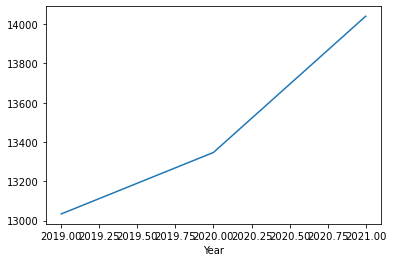

In [104]:
df.groupby("Year").Salary.mean().plot()